In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('4xmm_slim_dr14_preprocessed.csv', index_col=0)
df

,sc_ra,sc_dec,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,...,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ext_ml,mjd_first,mjd_last,n_detections,datetime_first,datetime_last
iauname,,,,,,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,0.000981,-55.351745,2.339110e-16,7.477733e-16,7.503544e-16,3.047059e-16,4.004341e-15,6.556074e-15,2.705045e-15,6.556074e-15,...,0.104073,-0.878259,0.556416,0.0,-0.523192,56086.742951,56087.588194,1,2012-06-08 17:49:51,2012-06-09 14:07:00
4XMM J000000.2+623123,0.001078,62.523116,4.822757e-17,8.126540e-18,1.471056e-15,3.210278e-15,8.737898e-16,6.721141e-15,3.433501e-15,6.721141e-15,...,0.987450,-0.158213,-0.848036,0.0,-0.796511,54134.485278,54135.043600,1,2007-02-03 11:38:48,2007-02-04 01:02:47
4XMM J000000.3-250629,0.001297,-25.108317,1.653872e-16,1.422986e-15,5.314440e-16,8.581970e-16,7.553166e-16,6.078558e-15,4.116765e-15,6.078558e-15,...,-0.310173,-0.235250,-0.215945,0.0,-0.598660,51696.440880,51696.788090,1,2000-06-01 10:34:52,2000-06-01 18:54:51
4XMM J000000.3-601742,0.001366,-60.295115,6.988109e-16,1.330748e-15,1.541574e-15,1.073534e-15,4.071881e-16,5.074447e-15,5.366679e-15,5.074447e-15,...,-0.001515,-0.487231,-0.684380,0.0,-0.874466,58972.676377,58972.858889,1,2020-05-03 16:13:59,2020-05-03 20:36:48
4XMM J000000.5-552138,0.002201,-55.360745,8.864110e-16,1.695742e-15,1.293371e-15,2.222728e-15,1.120018e-14,1.819022e-14,5.588499e-15,1.819022e-14,...,-0.106951,-0.258388,0.301328,0.0,-0.312634,56086.742951,56087.588194,1,2012-06-08 17:49:51,2012-06-09 14:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4XMM J235958.3+681605,359.993255,68.268267,0.000000e+00,6.657592e-16,2.305227e-15,7.177528e-15,1.509237e-14,2.561365e-14,7.376457e-15,2.561365e-14,...,0.502938,0.033903,-0.290683,0.0,-0.651578,56291.882303,56292.258924,1,2012-12-30 21:10:31,2012-12-31 06:12:51
4XMM J235958.4+443342,359.993407,44.561783,9.024415e-16,3.593635e-15,3.326689e-15,1.949474e-15,1.983093e-14,3.464743e-14,1.216217e-14,3.464743e-14,...,-0.116649,-0.542414,0.472531,0.0,-1.097485,55578.776979,55579.143507,1,2011-01-17 18:38:51,2011-01-18 03:26:39
4XMM J235958.8-251113,359.995216,-25.187033,4.037357e-16,4.317132e-16,3.785663e-15,3.934840e-15,2.086958e-14,2.974387e-14,8.826556e-15,2.974387e-14,...,0.830117,-0.562684,0.304205,0.0,-0.911902,51696.440880,51696.788090,1,2000-06-01 10:34:52,2000-06-01 18:54:51


In [3]:
df.columns

Index(['sc_ra', 'sc_dec', 'sc_ep_1_flux', 'sc_ep_2_flux', 'sc_ep_3_flux',
       'sc_ep_4_flux', 'sc_ep_5_flux', 'sc_ep_8_flux', 'sc_ep_9_flux',
       'sc_ep_8_fmin', 'sc_ep_8_fmax', 'sc_hr1', 'sc_hr2', 'sc_hr3', 'sc_hr4',
       'sc_extent', 'sc_ext_ml', 'mjd_first', 'mjd_last', 'n_detections',
       'datetime_first', 'datetime_last'],
      dtype='object')

In [4]:
df_spatial = df[['sc_ra', 'sc_dec']]
df_spatial

,sc_ra,sc_dec
iauname,,
4XMM J000000.2-552106,0.000981,-55.351745
4XMM J000000.2+623123,0.001078,62.523116
4XMM J000000.3-250629,0.001297,-25.108317
4XMM J000000.3-601742,0.001366,-60.295115
4XMM J000000.5-552138,0.002201,-55.360745
...,...,...
4XMM J235958.3+681605,359.993255,68.268267
4XMM J235958.4+443342,359.993407,44.561783
4XMM J235958.8-251113,359.995216,-25.187033


In [5]:
df = df[[
    'sc_ep_1_flux', 'sc_ep_2_flux', 'sc_ep_3_flux',
       'sc_ep_4_flux', 'sc_ep_5_flux', 'sc_ep_8_flux', 'sc_ep_9_flux',
       'sc_ep_8_fmin', 'sc_ep_8_fmax', 'sc_hr1', 'sc_hr2', 'sc_hr3', 'sc_hr4',
       'sc_extent', 'sc_ext_ml','n_detections'
]]

In [6]:
df

,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,sc_ep_8_fmax,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ext_ml,n_detections
iauname,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,2.339110e-16,7.477733e-16,7.503544e-16,3.047059e-16,4.004341e-15,6.556074e-15,2.705045e-15,6.556074e-15,6.556074e-15,0.357308,0.104073,-0.878259,0.556416,0.0,-0.523192,1
4XMM J000000.2+623123,4.822757e-17,8.126540e-18,1.471056e-15,3.210278e-15,8.737898e-16,6.721141e-15,3.433501e-15,6.721141e-15,6.721141e-15,-0.930889,0.987450,-0.158213,-0.848036,0.0,-0.796511,1
4XMM J000000.3-250629,1.653872e-16,1.422986e-15,5.314440e-16,8.581970e-16,7.553166e-16,6.078558e-15,4.116765e-15,6.078558e-15,6.078558e-15,0.800173,-0.310173,-0.235250,-0.215945,0.0,-0.598660,1
4XMM J000000.3-601742,6.988109e-16,1.330748e-15,1.541574e-15,1.073534e-15,4.071881e-16,5.074447e-15,5.366679e-15,5.074447e-15,5.074447e-15,0.415405,-0.001515,-0.487231,-0.684380,0.0,-0.874466,1
4XMM J000000.5-552138,8.864110e-16,1.695742e-15,1.293371e-15,2.222728e-15,1.120018e-14,1.819022e-14,5.588499e-15,1.819022e-14,1.819022e-14,0.262650,-0.106951,-0.258388,0.301328,0.0,-0.312634,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4XMM J235958.3+681605,0.000000e+00,6.657592e-16,2.305227e-15,7.177528e-15,1.509237e-14,2.561365e-14,7.376457e-15,2.561365e-14,2.561365e-14,1.000000,0.502938,0.033903,-0.290683,0.0,-0.651578,1
4XMM J235958.4+443342,9.024415e-16,3.593635e-15,3.326689e-15,1.949474e-15,1.983093e-14,3.464743e-14,1.216217e-14,3.464743e-14,3.464743e-14,0.615636,-0.116649,-0.542414,0.472531,0.0,-1.097485,1
4XMM J235958.8-251113,4.037357e-16,4.317132e-16,3.785663e-15,3.934840e-15,2.086958e-14,2.974387e-14,8.826556e-15,2.974387e-14,2.974387e-14,0.138364,0.830117,-0.562684,0.304205,0.0,-0.911902,1


In [7]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# apply PCA
pca = PCA(n_components=0.99)  # retain 99% of variance
pca.fit(scaled_data)
pca.explained_variance_ratio_

array([0.4167862 , 0.12079356, 0.08078554, 0.07054859, 0.06443362,
       0.06352605, 0.05722122, 0.05599156, 0.02889102, 0.01843182,
       0.01055197, 0.00450924])

In [8]:
df_pca = pca.transform(scaled_data)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.380111,0.521309,1.563196,-0.306817,0.049992,-0.017984,0.737899,0.004436,-0.158144,-0.192302,0.174398,-0.152662
1,-1.296002,-0.968089,-1.958653,-2.058708,0.049841,0.898905,0.607596,0.201628,-0.824433,-0.120043,-0.435940,-0.085398
2,-1.305101,0.576908,0.225649,0.869209,-0.149926,-0.918575,-0.519132,-0.169999,-0.083478,-0.014969,0.062286,0.024370
3,-1.219676,0.643236,-0.494553,0.312397,-0.196767,-0.374881,0.122522,-0.109656,-0.826046,0.087701,-0.013133,0.040834
4,-0.844993,0.073117,0.783255,-0.328337,-0.046593,-0.455844,-0.434028,-0.120553,0.114033,-0.158004,0.054830,-0.007931


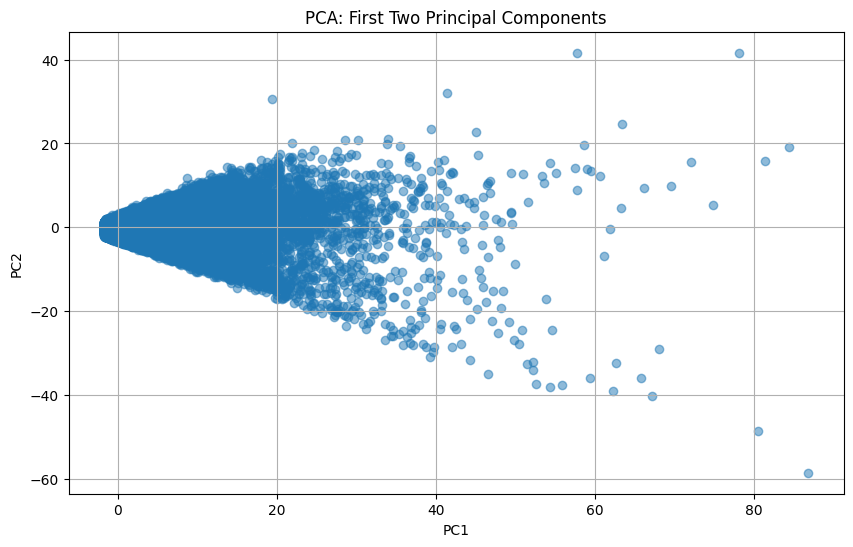

In [9]:
# plot a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [10]:
df_spatial.describe()

,sc_ra,sc_dec
count,449898.000000,449898.000000
mean,174.302196,-3.223237
std,102.840313,38.169772
min,0.000981,-88.192989
25%,81.332132,-33.039119
50%,180.513660,-1.786155
75%,260.388587,27.709382
max,359.999520,89.403537


In [32]:
# create a matrix 360 x 180 of lists
matrix_sky = np.zeros((360, 180), dtype=object)
for i in range(360):
    for j in range(180):
        matrix_sky[i, j] = []

In [33]:
for value, position in zip(df_pca.values, df_spatial.values):
    x = int(position[0])
    y = int(position[1]) + 90
    matrix_sky[x, y].append(value[0])  # append the first principal component value
# calculate matrix_sky_mean, matrix_sky_sum, and matrix_sky_std
matrix_sky_mean = np.zeros((360, 180))
matrix_sky_sum = np.zeros((360, 180))
matrix_sky_std = np.zeros((360, 180))
for i in range(360):
    for j in range(180):
        if len(matrix_sky[i, j]) > 0:
            matrix_sky_mean[i, j] = np.mean(matrix_sky[i, j])
            matrix_sky_sum[i, j] = np.sum(matrix_sky[i, j])
            matrix_sky_std[i, j] = np.std(matrix_sky[i, j])
## apply convolution to smooth the matrix
#from scipy.ndimage import gaussian_filter
#matrix_sky = gaussian_filter(matrix_sky, sigma=1)

In [35]:
# plot the 3 matrices with plotly express in a single figure
fig = px.imshow(matrix_sky_mean, aspect='auto', color_continuous_scale='RdBu', color_continuous_midpoint=0,
                labels={'color': 'PC1 Value'},
                title='PCA Projection on 360x180 Matrix',
                width=600, height=600)
fig.update_layout(xaxis_title='RA (scaled)', yaxis_title='DEC (scaled)')
fig.show()
# plot the sum matrix
fig = px.imshow(matrix_sky_sum, aspect='auto', color_continuous_scale='RdBu', color_continuous_midpoint=0,
                labels={'color': 'PC1 Sum'},
                title='PCA Projection on 360x180 Matrix (Sum)',
                width=600, height=600)
fig.update_layout(xaxis_title='RA (scaled)', yaxis_title='DEC (scaled)')
fig.show()
# plot the std matrix
fig = px.imshow(matrix_sky_std, aspect='auto', color_continuous_scale='RdBu', color_continuous_midpoint=0,
                labels={'color': 'PC1 Std'},
                title='PCA Projection on 360x180 Matrix (Std)',
                width=600, height=600)
fig.update_layout(xaxis_title='RA (scaled)', yaxis_title='DEC (scaled)')
fig.show()